# Stationarity

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from statsmodels.tsa.stattools import adfuller
import scipy as sp
import statsmodels.api as sm
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


Stationary time series

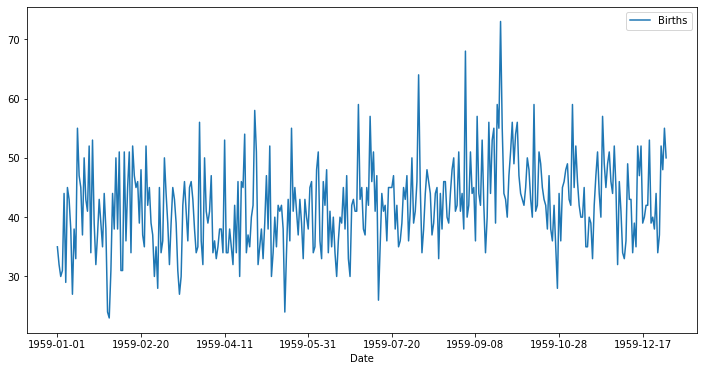

In [4]:
fb = pd.read_csv('D:/data/csv/female_births.csv', header=0, index_col=0)
fb.plot();

Non-stationary time series

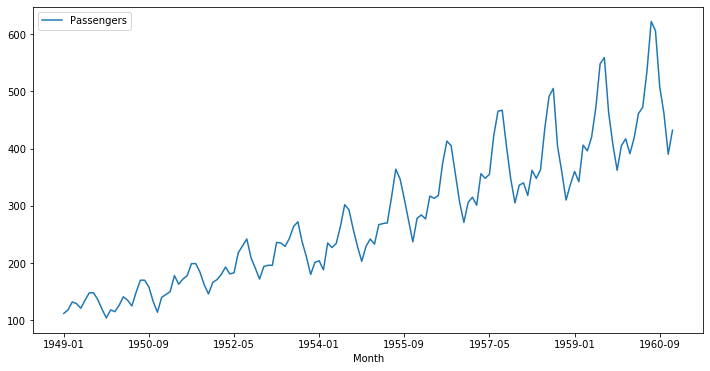

In [5]:
ap = pd.read_csv('D:/data/csv/airline_passengers.csv', header=0, index_col=0)
ap.plot();

In [6]:
def ts_dist(ts, nsplit):
    figsize(20,10)
    split = (int)(ts.shape[0]/nsplit)
    start=0
    Ts = []
    for i in range(nsplit):
        end=start+split
        Ts.append(ts[start:end])
        start=end+1
        end=start+split
    for ts in Ts:
        sns.distplot(ts);

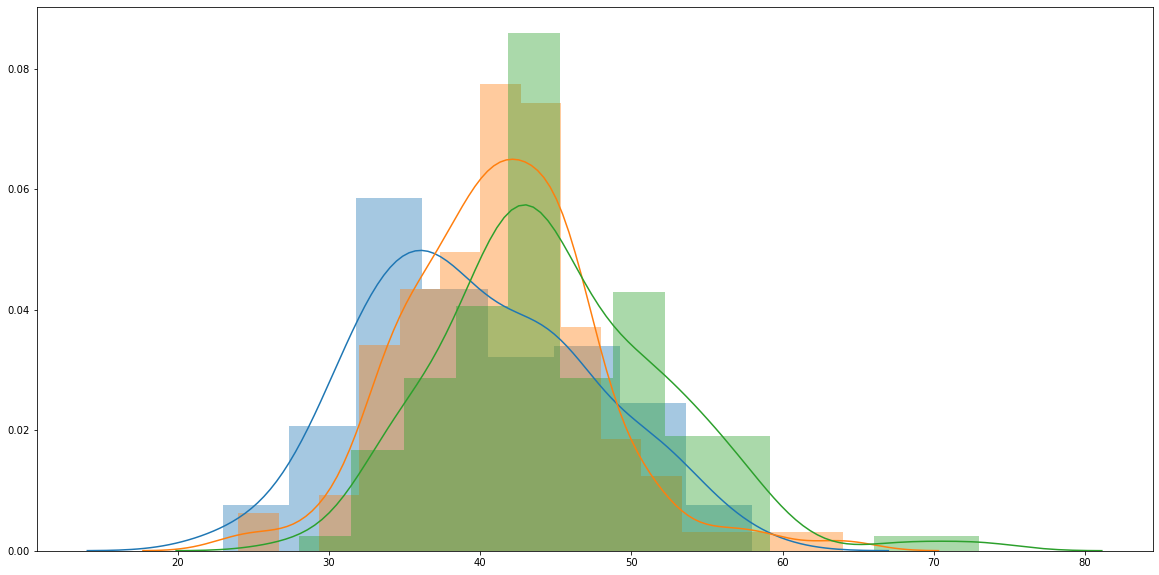

In [7]:
ts_dist(ts=fb, nsplit=3)

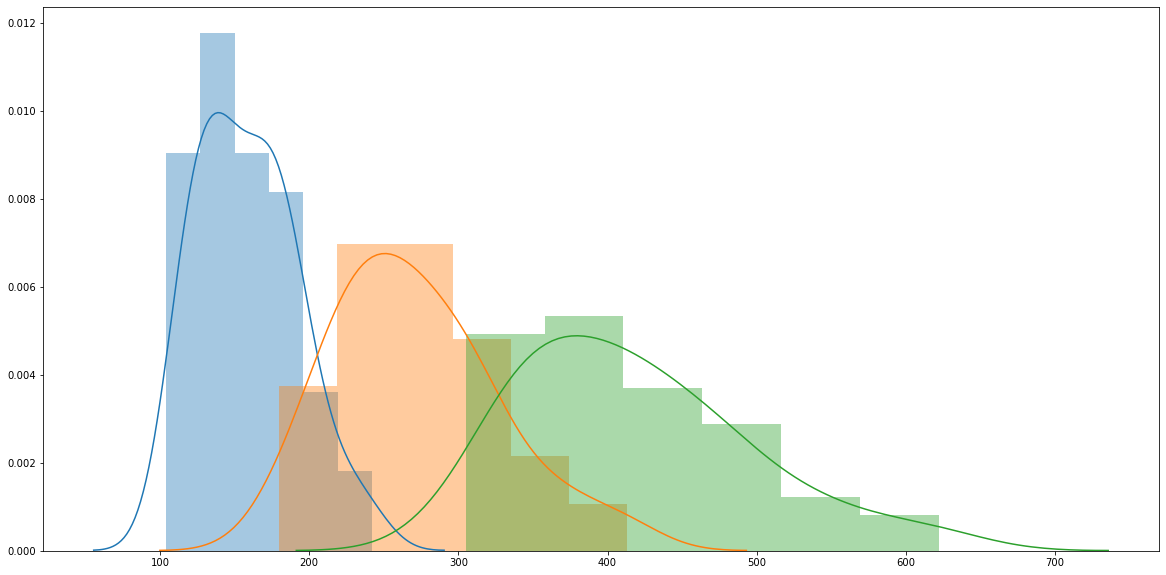

In [8]:
ts_dist(ts=ap, nsplit=3)

### Dickey-Fuller test
Ho: non stationarity (root unit present in AR model)

In [9]:
X = fb.values
res = adfuller(X)
print('p-value:\t' , res[1])

p-value:	 5.187572355823294e-28


### Autocorrelation

Not autocorrelated

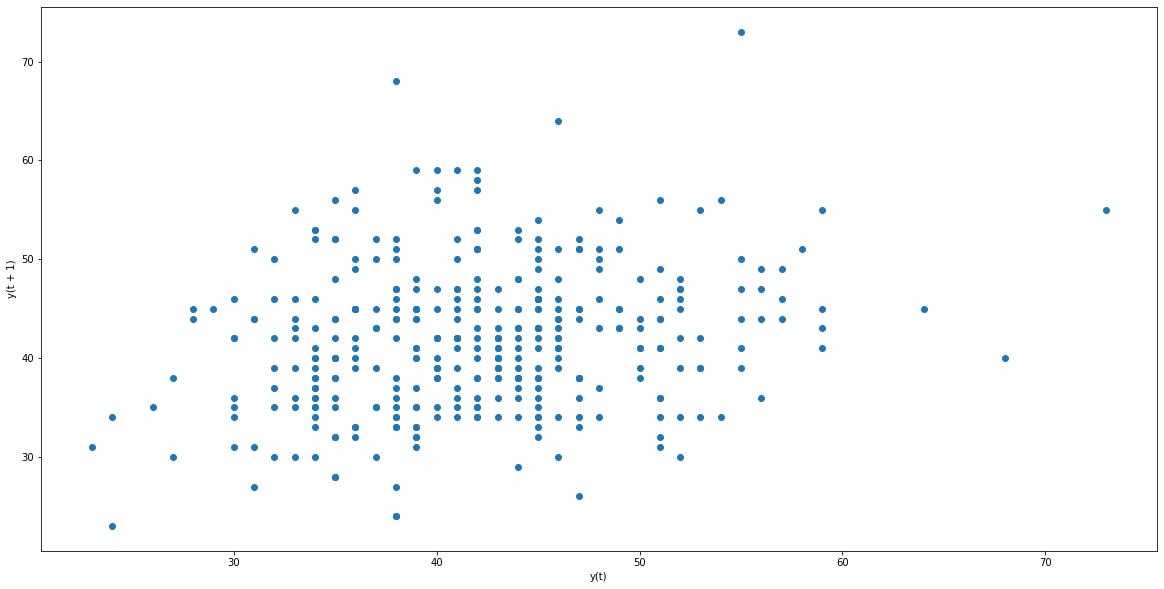

In [10]:
pd.plotting.lag_plot(fb, lag=1);

Autocorrelated

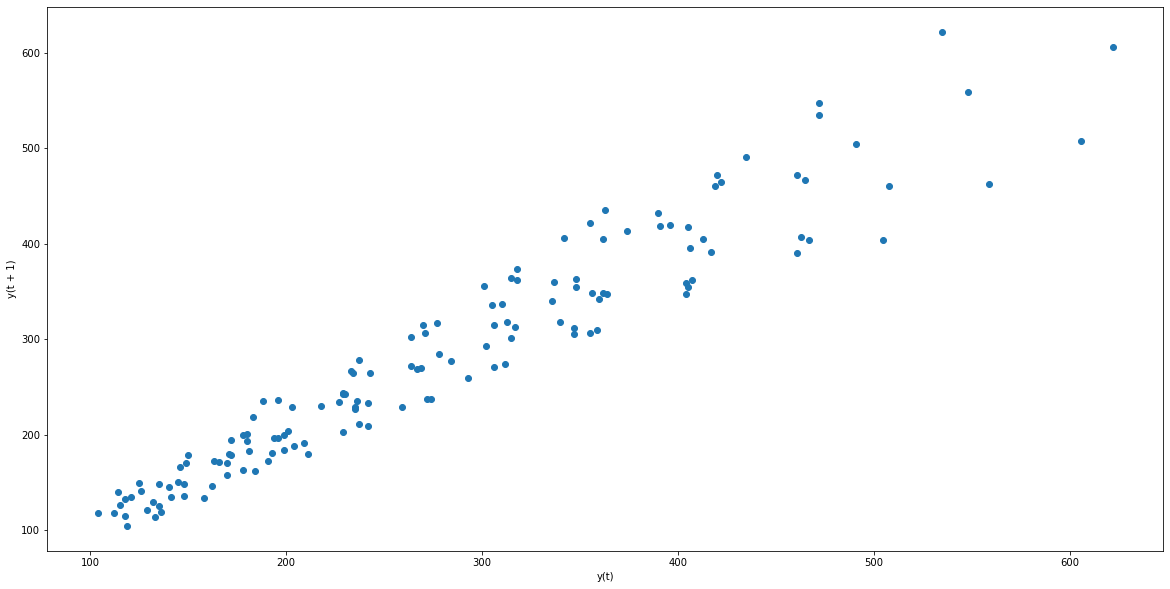

In [11]:
pd.plotting.lag_plot(ap, lag=1);

### White noise testing

Generate white noise time series

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

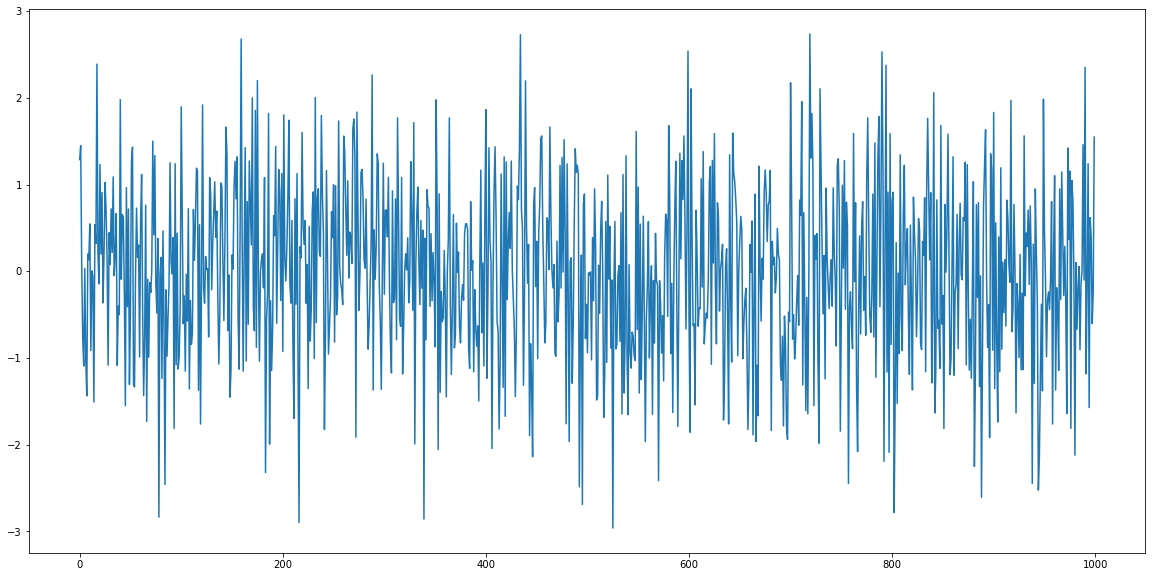

In [12]:
rnd.seed(1)
wn = [rnd.gauss(0.0, 1.0) for i in range(1000)]
wn = pd.Series(wn)
wn.plot()
wn.describe()

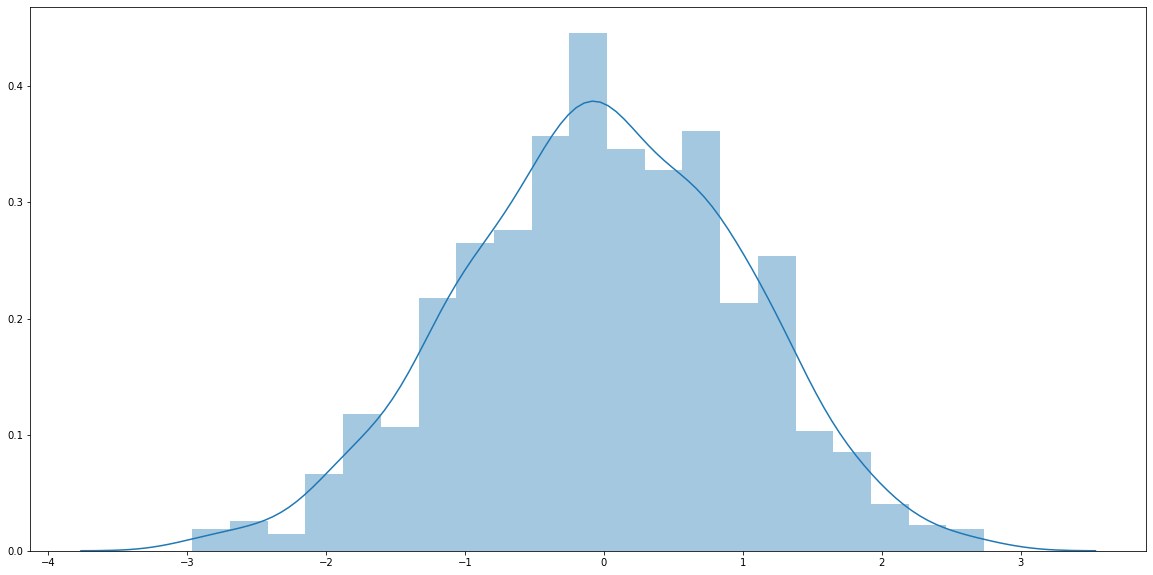

In [13]:
ts_dist(ts=wn, nsplit=1)

Autocorrelation

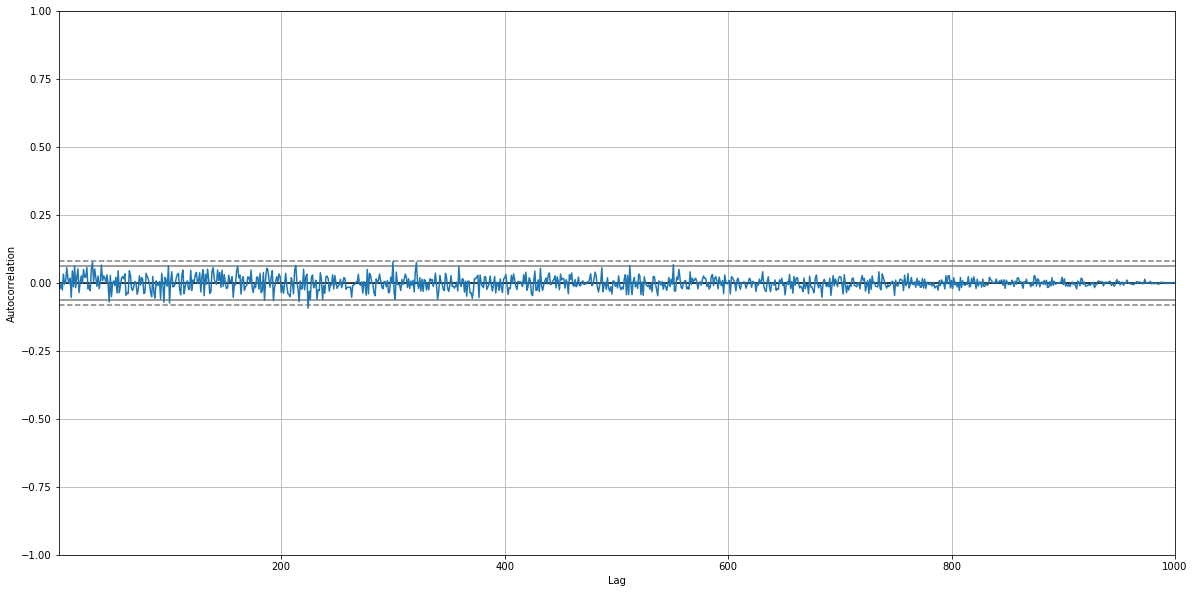

In [14]:
pd.plotting.autocorrelation_plot(wn);

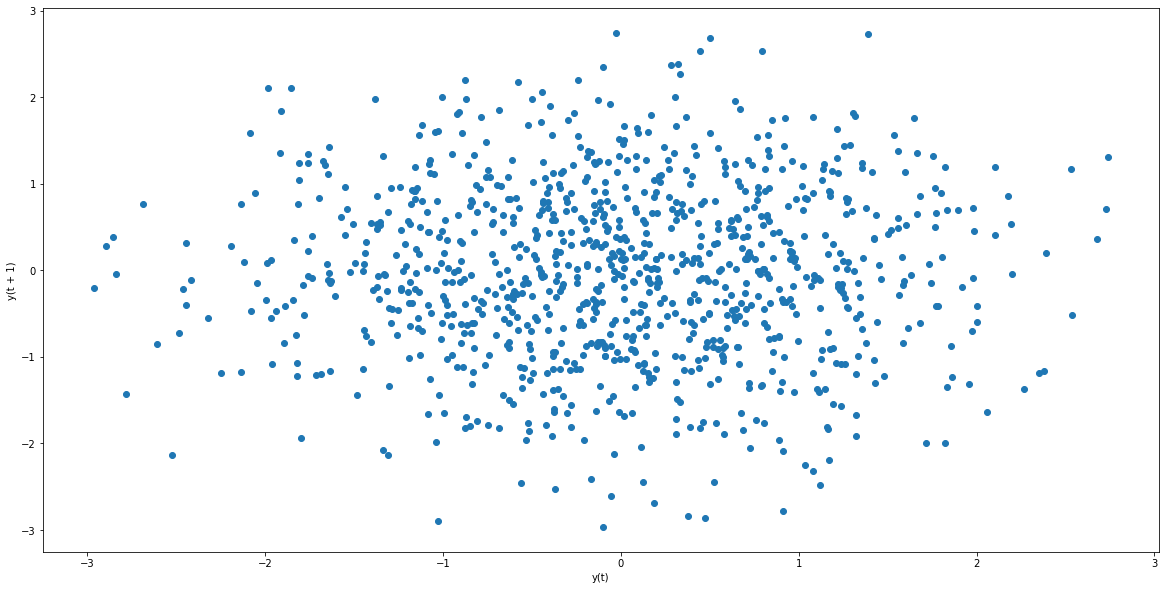

In [15]:
pd.plotting.lag_plot(wn, lag=1);

### Ljung-Box test 
Autocorrelation in residuals

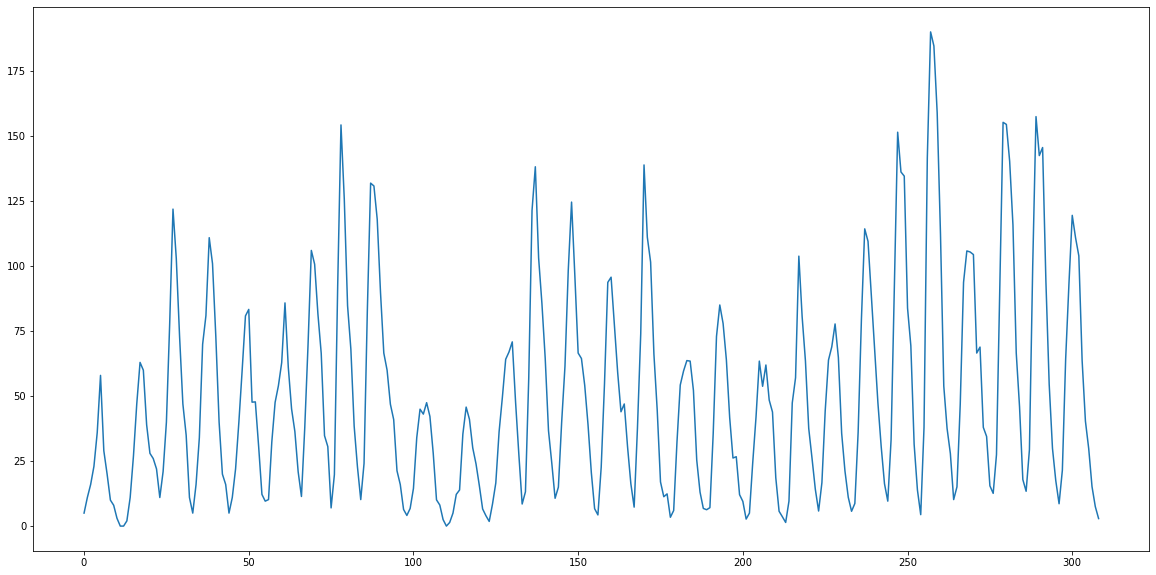

In [20]:
df = sm.datasets.sunspots.load_pandas().data
df = df.fillna(0)
ts = df['SUNACTIVITY']
ts.plot();

In [23]:
res = sm.tsa.ARMA(ts, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,214.107099,1.827280e-40


In [25]:
res = sm.tsa.ARMA(wn, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.592144,0.848287


In [26]:
res = sm.tsa.ARMA(ap, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,lb_stat,lb_pvalue
10,13.764753,0.183995


In [27]:
res = sm.tsa.ARMA(fb, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,lb_stat,lb_pvalue
10,11.31156,0.333765


### Normality tests

#### D'Agostino 
Tests null hypothesis that a sample comes from a normal distribution

In [29]:
sp.stats.normaltest(wn)

NormaltestResult(statistic=3.1324702657749595, pvalue=0.20882992111364135)

#### Shapiro
Tests null hypothesis that a sample comes from a normal distribution

In [31]:
sp.stats.shapiro(wn)

(0.9979580044746399, 0.265500009059906)

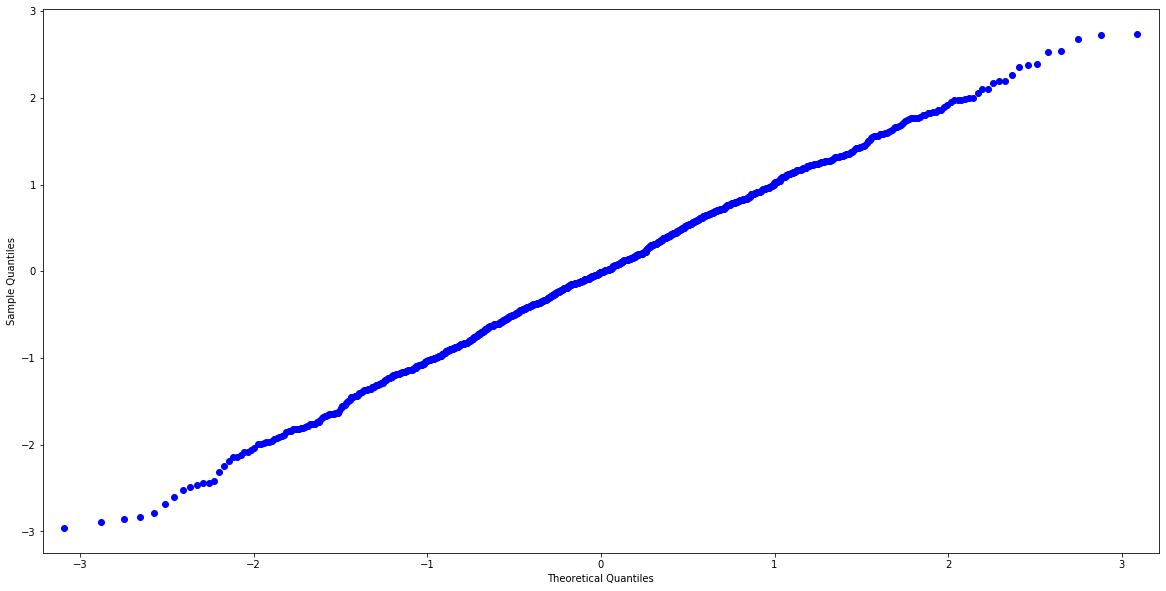

In [33]:
sm.qqplot(wn);

### Credits & Links

https://machinelearningmastery.com/time-series-data-stationary-python/